In [46]:
import numpy as np
import sklearn, os, sys
from sklearn import svm
from skimage import data, io, filters
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [18]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data
from utils import plot

In [15]:
dataset = data.init_dataset()
labels = dataset.labels
dataset.train[0:3]

['84accc2dc9f5bb3ebee89fe1bf23639c.jpg',
 '14cffe576239620f1733dfe487dbaa6f.jpg',
 'cc93915e06bc55626a02af95006a48c2.jpg']

['great_dane', 'irish_terrier', 'afghan_hound', 'kerry_blue_terrier', 'great_dane', 'norfolk_terrier', 'chesapeake_bay_retriever', 'french_bulldog', 'borzoi', 'affenpinscher']


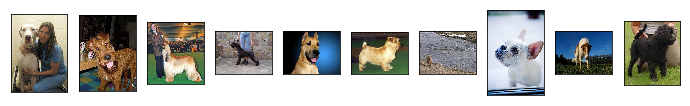

In [25]:
x_train = []
y_train = []
i = 16
for i,img_name in enumerate(dataset.train[i:i+10]):
    img = data.read_img('train/',img_name)
    x_train.append(img)
    id_ = img_name.split('.')[0]
    breed = labels.loc[labels['id'] == id_]
    y_train.append(breed['breed'].item())


plot.multiple(x_train)
print(y_train)

In [96]:
face_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_eye.xml')
face_cascade

<CascadeClassifier 0x1213cb370>

In [97]:
os.listdir('../haarcascades')

['haarcascade_upperbody.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_profileface.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_eye.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_licence_plate_rus_16stages.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_smile.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_eye_tree_eyeglasses.xml']

In [98]:
img_name = '../datasets/train/' + dataset.train[16]
img_name

'../datasets/train/365020fbc3a02a725b3a682ef6899673.jpg'

In [99]:
img = cv2.imread(img_name)
type(img)

numpy.ndarray

In [100]:
gray = cv2.cvtColor(img, 6) # COLOR_BGR2GRAY

In [101]:
faces = eye_cascade.detectMultiScale(gray, 1.3, 5)

In [102]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [ ]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()